In [6]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.linalg import Vectors, DenseVector
from pyspark.sql.functions import udf, col
from pyspark.sql.types import ArrayType, DoubleType

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [8]:
udf_features = udf(lambda x, y: Vectors.dense([x, y]), ArrayType(DoubleType()))
data = (spark.read.parquet("../../../data/clustering")
        .withColumn("features", udf_features(col("x"), col("y")))
        .persist())  

data.show(2)

Py4JJavaError: An error occurred while calling o163.showString.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 5.0 failed 1 times, most recent failure: Lost task 0.0 in stage 5.0 (TID 5, localhost, executor driver): net.razorvine.pickle.PickleException: expected zero arguments for construction of ClassDict (for pyspark.ml.linalg.DenseVector)
	at net.razorvine.pickle.objects.ClassDictConstructor.construct(ClassDictConstructor.java:23)
	at net.razorvine.pickle.Unpickler.load_reduce(Unpickler.java:707)
	at net.razorvine.pickle.Unpickler.dispatch(Unpickler.java:175)
	at net.razorvine.pickle.Unpickler.load(Unpickler.java:99)
	at net.razorvine.pickle.Unpickler.loads(Unpickler.java:112)
	at org.apache.spark.sql.execution.python.BatchEvalPythonExec$$anonfun$doExecute$1$$anonfun$apply$6.apply(BatchEvalPythonExec.scala:156)
	at org.apache.spark.sql.execution.python.BatchEvalPythonExec$$anonfun$doExecute$1$$anonfun$apply$6.apply(BatchEvalPythonExec.scala:155)
	at scala.collection.Iterator$$anon$12.nextCur(Iterator.scala:434)
	at scala.collection.Iterator$$anon$12.hasNext(Iterator.scala:440)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:408)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIterator.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenExec$$anonfun$8$$anon$1.hasNext(WholeStageCodegenExec.scala:377)
	at org.apache.spark.sql.execution.columnar.InMemoryRelation$$anonfun$1$$anon$1.hasNext(InMemoryRelation.scala:132)
	at org.apache.spark.storage.memory.MemoryStore.putIteratorAsBytes(MemoryStore.scala:363)
	at org.apache.spark.storage.BlockManager$$anonfun$doPutIterator$1.apply(BlockManager.scala:1021)
	at org.apache.spark.storage.BlockManager$$anonfun$doPutIterator$1.apply(BlockManager.scala:996)
	at org.apache.spark.storage.BlockManager.doPut(BlockManager.scala:936)
	at org.apache.spark.storage.BlockManager.doPutIterator(BlockManager.scala:996)
	at org.apache.spark.storage.BlockManager.getOrElseUpdate(BlockManager.scala:700)
	at org.apache.spark.rdd.RDD.getOrCompute(RDD.scala:334)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:285)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:38)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:323)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:287)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:38)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:323)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:287)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:87)
	at org.apache.spark.scheduler.Task.run(Task.scala:99)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:322)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1145)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:615)
	at java.lang.Thread.run(Thread.java:745)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1435)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1423)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1422)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1422)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:802)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:802)
	at scala.Option.foreach(Option.scala:257)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:802)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:1650)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1605)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1594)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:628)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1925)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1938)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1951)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:333)
	at org.apache.spark.sql.execution.CollectLimitExec.executeCollect(limit.scala:38)
	at org.apache.spark.sql.Dataset$$anonfun$org$apache$spark$sql$Dataset$$execute$1$1.apply(Dataset.scala:2386)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:57)
	at org.apache.spark.sql.Dataset.withNewExecutionId(Dataset.scala:2788)
	at org.apache.spark.sql.Dataset.org$apache$spark$sql$Dataset$$execute$1(Dataset.scala:2385)
	at org.apache.spark.sql.Dataset.org$apache$spark$sql$Dataset$$collect(Dataset.scala:2392)
	at org.apache.spark.sql.Dataset$$anonfun$head$1.apply(Dataset.scala:2128)
	at org.apache.spark.sql.Dataset$$anonfun$head$1.apply(Dataset.scala:2127)
	at org.apache.spark.sql.Dataset.withTypedCallback(Dataset.scala:2818)
	at org.apache.spark.sql.Dataset.head(Dataset.scala:2127)
	at org.apache.spark.sql.Dataset.take(Dataset.scala:2342)
	at org.apache.spark.sql.Dataset.showString(Dataset.scala:248)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:57)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:606)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:280)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:214)
	at java.lang.Thread.run(Thread.java:745)
Caused by: net.razorvine.pickle.PickleException: expected zero arguments for construction of ClassDict (for pyspark.ml.linalg.DenseVector)
	at net.razorvine.pickle.objects.ClassDictConstructor.construct(ClassDictConstructor.java:23)
	at net.razorvine.pickle.Unpickler.load_reduce(Unpickler.java:707)
	at net.razorvine.pickle.Unpickler.dispatch(Unpickler.java:175)
	at net.razorvine.pickle.Unpickler.load(Unpickler.java:99)
	at net.razorvine.pickle.Unpickler.loads(Unpickler.java:112)
	at org.apache.spark.sql.execution.python.BatchEvalPythonExec$$anonfun$doExecute$1$$anonfun$apply$6.apply(BatchEvalPythonExec.scala:156)
	at org.apache.spark.sql.execution.python.BatchEvalPythonExec$$anonfun$doExecute$1$$anonfun$apply$6.apply(BatchEvalPythonExec.scala:155)
	at scala.collection.Iterator$$anon$12.nextCur(Iterator.scala:434)
	at scala.collection.Iterator$$anon$12.hasNext(Iterator.scala:440)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:408)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIterator.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenExec$$anonfun$8$$anon$1.hasNext(WholeStageCodegenExec.scala:377)
	at org.apache.spark.sql.execution.columnar.InMemoryRelation$$anonfun$1$$anon$1.hasNext(InMemoryRelation.scala:132)
	at org.apache.spark.storage.memory.MemoryStore.putIteratorAsBytes(MemoryStore.scala:363)
	at org.apache.spark.storage.BlockManager$$anonfun$doPutIterator$1.apply(BlockManager.scala:1021)
	at org.apache.spark.storage.BlockManager$$anonfun$doPutIterator$1.apply(BlockManager.scala:996)
	at org.apache.spark.storage.BlockManager.doPut(BlockManager.scala:936)
	at org.apache.spark.storage.BlockManager.doPutIterator(BlockManager.scala:996)
	at org.apache.spark.storage.BlockManager.getOrElseUpdate(BlockManager.scala:700)
	at org.apache.spark.rdd.RDD.getOrCompute(RDD.scala:334)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:285)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:38)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:323)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:287)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:38)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:323)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:287)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:87)
	at org.apache.spark.scheduler.Task.run(Task.scala:99)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:322)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1145)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:615)
	... 1 more


In [4]:
type(Vectors.dense([1,2]))

pyspark.ml.linalg.DenseVector

In [ ]:
points = data.map(lambda p: (p[0], p[1])).collect()
fig, ax = plt.subplots()
plt.plot([tp[0] for tp in points], [tp[1] for tp in points], "o")
plt.title("data")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [56]:
nbCluster = 16
model = KMeans.train(data, nbCluster, 
                     maxIterations=20, 
                     initializationMode="k-means||",
                     seed=50, 
                     initializationSteps=20, 
                     epsilon=1e-6)

In [57]:
prediction = model.predict(data).collect()
points_prediction = zip(points, prediction)

In [58]:
points_prediction[:5]

[((-9.536089612616399, -11.045375075619603), 5),
 ((-10.475577352736479, -9.7088593180168772), 5),
 ((-8.4571189567818408, -9.4239872004926095), 5),
 ((-9.6134556472080899, -10.34863203150554), 5),
 ((-9.6750855325299785, -10.757201027930972), 5)]

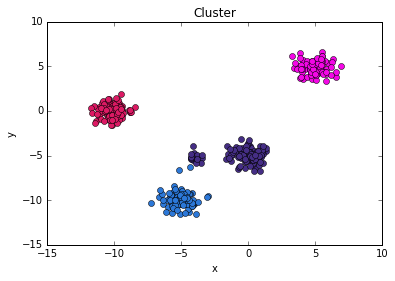

In [84]:
color_maps = {indice: np.random.rand(3,1) for indice in range(nbCluster)}

fig, ax = plt.subplots()
for indice in range(4):
    points_cluster = [tp[0] for tp in points_prediction if tp[1] == indice]
    ax.plot(map(lambda x: x[0], points_cluster), 
            map(lambda x: x[1], points_cluster),
            'o', c = color_maps[indice])

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Cluster")
plt.show()

In [70]:
cluster_centers = [(center[0], center[1]) for center in model.clusterCenters]
#cluster_centers

In [72]:
squared_distance = lambda x,y: (x[0]-y[0])**2 + (x[1]-y[1])**2

In [73]:
[squared_distance(point[0], cluster_centers[point[1]]) for point in points_prediction]

[1.2485084911924149,
 0.29205027939679218,
 2.9966228038191822,
 0.28738120961516656,
 0.63660974139163029,
 1.0441106915429967,
 0.47817107250117352,
 1.3506982028998649,
 1.3987851619713263,
 1.4492762351229458,
 0.84204520946873307,
 1.4362215478144866,
 0.06016684369015815,
 2.7261396861939353,
 0.3889803062778267,
 0.49817219251489836,
 0.70331456378186563,
 0.54836481342240317,
 3.305362507423748,
 1.2213798171880179,
 0.64391844657347375,
 1.0889904091698244,
 0.50190162471778488,
 1.5729877873445974,
 0.079569455124250968,
 0.59208283814038043,
 0.26619065640441242,
 1.2462476613365796,
 1.6824175839772089,
 0.46424641855517262,
 0.22835100332071764,
 1.5512118860148143,
 0.48540758665269879,
 2.1204823201142027,
 0.87672404810051474,
 0.070798263891150584,
 0.59182166600588171,
 0.94639174800873205,
 1.5912322921364108,
 0.12520952627164481,
 1.1586958812549746,
 0.0012076185317743825,
 1.0342238900952738,
 0.72642888212347811,
 0.43191416266149951,
 0.73720739031467031,
 0.55

In [67]:
model.clusterCenters[0][0]

4.9245454709878533